Máquinas de soporte vectorial (regresión)
==========================

Es un método que nos sirve tanto para regresión como clasificación, el cual generaliza un clasificador simple llamado Maximal Margin Classifier. Para entenderlo, primero es necesario comprender el concepto de hiperplano; formalmente hablando, en un espacio euclideo $p$-dimensional, un hiperplano es un subespacio plano y afin de dimensión $p - 1$, descrito por la ecuación: $ \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n = 0$.
Veamos ejemplos de hiperplanos.

<center>

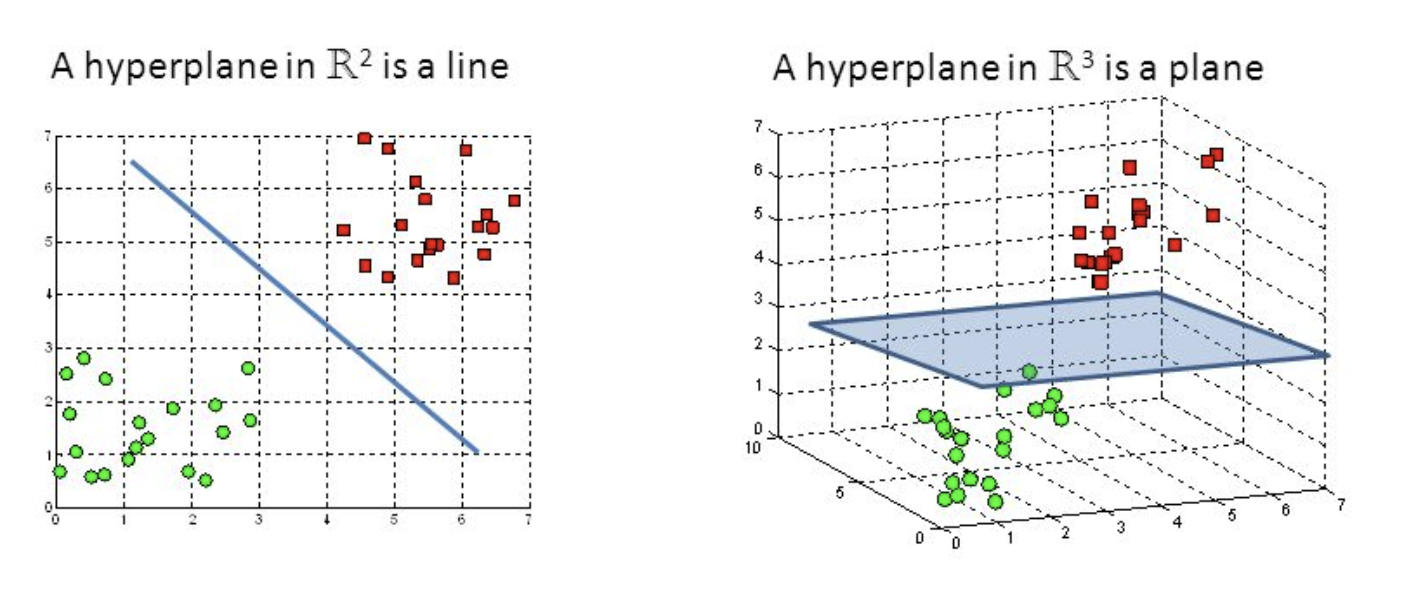

</center>

Ahora bien, las máquinas de soporte vectorial tienen una flexibilidad al error que nos permiten ajustarlo mejor. Mientras que en OLS minimizamos el error en todos los puntos de acuerdo con $min(\Sigma(y_i - w_ix_i)^2)$, en la SVR trabajamos con $min(\frac{1}{2}||w||^2)$, $|y_i - w_ix_i| <= \epsilon$. Visualmente hablando:

<center>

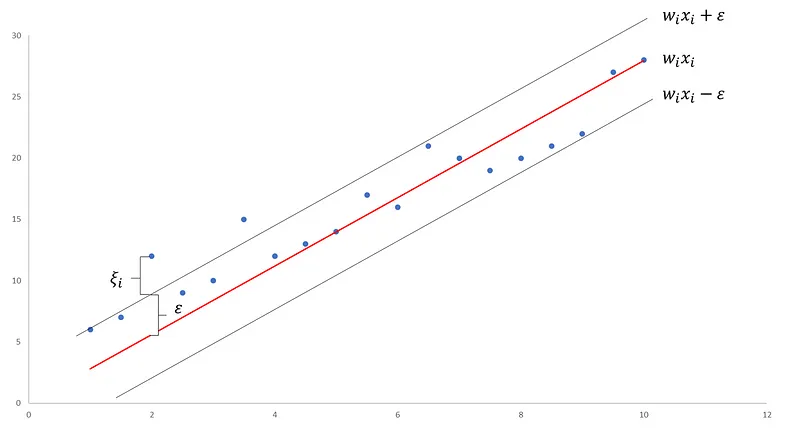

</center>

El vector rojo es la proyección del hiperplano, mientras que los vectores negros son los llamados *vectores de soporte*. Para SVR buscaremos que estos engloben la mayor cantidad de puntos, y los que queden fuera serán el error que minimizaremos.

Kernel
==========================

La mayoría de las veces los datos no siguen un comportamiento lineal, por lo que se les aplica una transformación que lleva eleva la dimensionalidad del conjunto, y de esta manera podamos tener una proyección curva. Ejemplo:

<center>

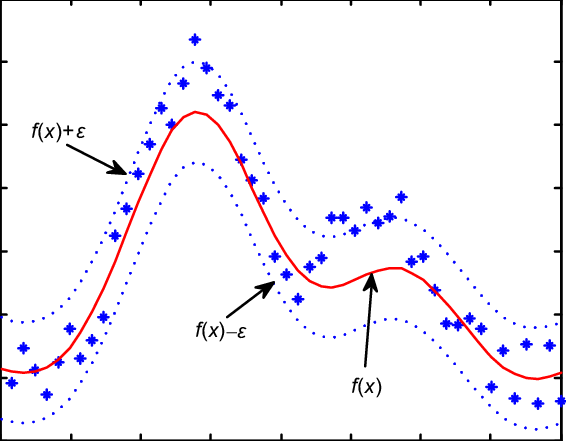

</center>

Las funciones más utilizadas son el lineal (a), polinomial (b), gaussiano(c) y el exponencial (d).

<center>

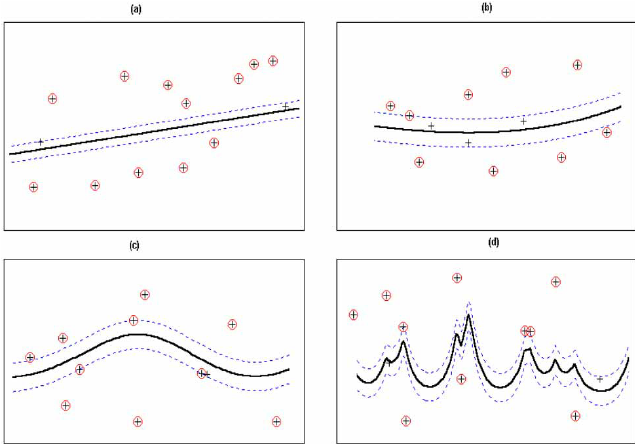

</center>

Implementación
==========================

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
dataset = pd.read_csv('./datasets/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
Y = dataset.iloc[:, 2].values

In [3]:
# Escalamos los datos ya que la SVR es muy sensible a los datos
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y.reshape(-1, 1))

In [4]:
# Entrenamos el modelo
from sklearn.svm import SVR
regression = SVR(kernel = "rbf")
regression.fit(X, Y)

# Predecimos los datos escalándolos
Y_pred = sc_Y.inverse_transform(
    regression.predict(
            sc_X.transform(
                np.array([[6.5]])
            )
        ).reshape(-1, 1)
    )

c:\Env\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


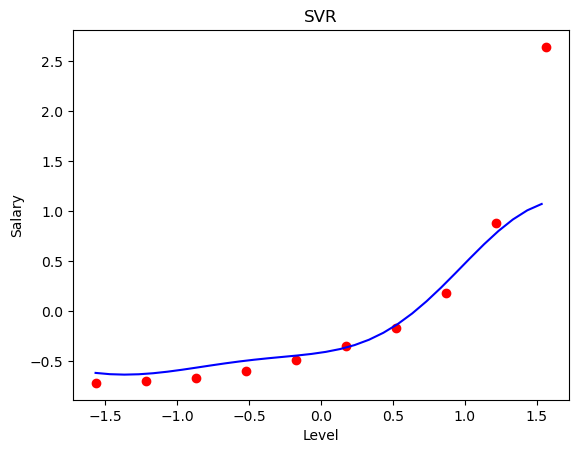

In [5]:
# Visualizamos los resultados
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, Y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("SVR")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Referencia:

* https://www.jacobsoft.com.mx/es_mx/support-vector-regression/

* https://www.cienciadedatos.net/documentos/34_maquinas_de_vector_soporte_support_vector_machines